# 数字图像处理实验2


实验要求：

- 将cat.jpg中猫放置到table.jpg中的桌子上

- 要求编程实现，而不是手工处理

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 第一种思路，直接遍历图像矩阵生成掩膜后替换

In [48]:
cat = cv.imread("cat.jpg")
table = cv.imread("table.jpg")

In [49]:
mask = np.zeros((360,640), np.uint8)
for i in range(0,mask.shape[0]):
    for j in range(0,mask.shape[1]):
        if all(cat[i,j]!=[12,255,18]): # 如果颜色不为绿色，则标记为白色
            mask[i,j]=255

In [50]:
mask_inv = cv.bitwise_not(mask) # 按位取反生成另一个掩膜

In [51]:
rows, cols = cat.shape[:2]
roi = table[200:200+rows,350:350+cols] # ROI区域，数值是毛估估的

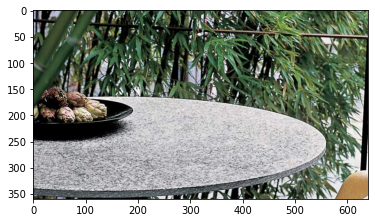

In [52]:
plt.imshow(roi[:,:,::-1])

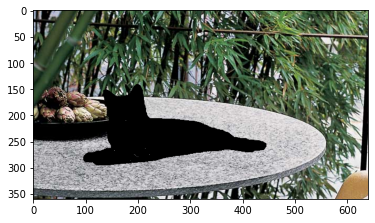

In [53]:
table_bg = cv.bitwise_and(roi,roi,mask = mask_inv) # 将ROI中🐱的区域涂黑
plt.imshow(table_bg[:,:,::-1])

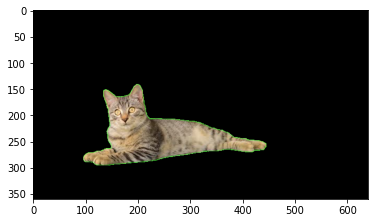

In [54]:
cat_fg = cv.bitwise_and(cat,cat,mask = mask) # 仅从图像中提取🐱的区域
plt.imshow(cat_fg[:,:,::-1])

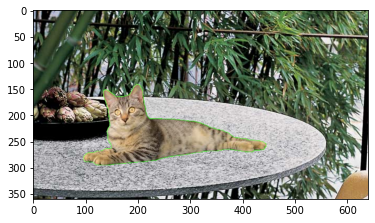

In [55]:
dst = cv.add(table_bg,cat_fg) # 将猫放入ROI
plt.imshow(dst[:,:,::-1])

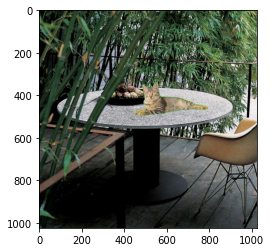

In [56]:
table[200:200+rows,350:350+cols] = dst # 修改原图
plt.imshow(table[:,:,::-1])

In [57]:
cv.imwrite("catontable.png",table)

True

## 第二种思路，用HSV筛选出绿色区域生成掩膜

In [58]:
green = np.uint8([[[0, 255, 0]]])
hsv_green = cv.cvtColor(green, cv.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


In [59]:
# 绿色的HSV区间
lower_green = np.array([35, 43, 46])
upper_green = np.array([77, 255, 255])

In [60]:
# 生成掩膜
hsv = cv.cvtColor(cat, cv.COLOR_BGR2HSV)
mask_inv_hsv = cv.inRange(hsv, lower_green, upper_green)
mask_hsv = cv.bitwise_not(mask_inv_hsv)

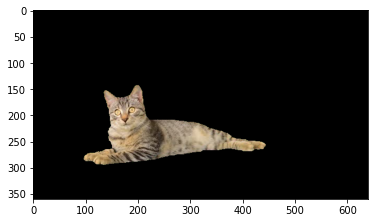

In [61]:
cat_fg_hsv = cv.bitwise_and(cat,cat,mask = mask_hsv)
plt.imshow(cat_fg_hsv[:,:,::-1])

In [62]:
cv.imshow("test",mask_inv_hsv)
cv.waitKey(0)
cv.destroyAllWindows()

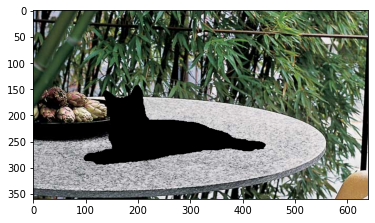

In [65]:
table_hsv = cv.imread("table.jpg")
roi_hsv=table_hsv[200:200+rows,350:350+cols]
table_bg_hsv = cv.bitwise_and(roi_hsv,roi_hsv,mask = mask_inv_hsv)
plt.imshow(table_bg_hsv[:,:,::-1])

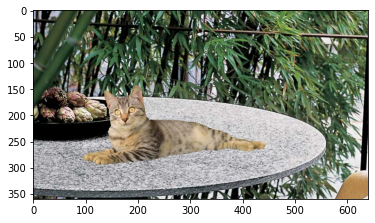

In [66]:
dst_hsv = cv.add(table_bg_hsv,cat_fg_hsv)
plt.imshow(dst_hsv[:,:,::-1])

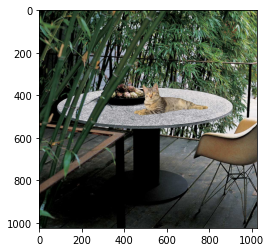

In [67]:
table_hsv[200:200+rows,350:350+cols] = dst_hsv
plt.imshow(table_hsv[:,:,::-1])

In [69]:
cv.imwrite("catontable_hsv.png",table_hsv)

True